#But du projet : Entrainer un réseau classifieur

##Partie 1 : CIFAR10

Ce projet suppose préalablement qu'on sait comment définir un résaeu de neurone, calculer la fonction de perte loss et mettre à jour les poids du réseau.  
Pour cette première partie du projet, les données sur lesquelles seront effectuées la tache de classification sont issues du jeu de données CIFAR10 du package torchvision.  
En important torchvision il devient aisé de télécharger le jeu de données CIFAR10, comme nous le montrons ici :

In [1]:
import torch
import torchvision
import torchvision.transforms as transforms

#### Préparation et chargement des données de test et d'entrainement

In [2]:
transform = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

batch_size = 4

trainset = torchvision.datasets.CIFAR10(root='./data', train=True,


                                        download=True, transform=transform) #Charge l'ensemble d'entraînement CIFAR-10 (train=true) et applique les
                                                                            #transformations définient précédemment aux images


trainloader = torch.utils.data.DataLoader(trainset, batch_size=batch_size, #créer un chargeur de données qui facilite la
                                                                           #manipulation des lots (batch_size) d'images.
                                          shuffle=True, num_workers=2)



testset = torchvision.datasets.CIFAR10(root='./data', train=False,      #Similaire au chargement de l'ensemble d'entraînement
                                                                        #mais avec train=False pour charger l'ensemble de test.
                                       download=True, transform=transform)


testloader = torch.utils.data.DataLoader(testset, batch_size=batch_size, #meme chose que trainloader, mais
                                                                         #sans mélange (shuffle=False), car non
                                                                          #nécessaire pour le test


                                         shuffle=False, num_workers=2)

100%|██████████| 170M/170M [00:14<00:00, 11.8MB/s]


####Nombre d'images dans les ensembles d'entrainement et de test

In [3]:
print("Nombre d'images dans l'ensemble d'entraînement :", len(trainset))#1896
print("Nombre d'images dans l'ensemble de test :", len(testset)) #1124

Nombre d'images dans l'ensemble d'entraînement : 50000
Nombre d'images dans l'ensemble de test : 10000


####Visualisation d'un batch d'images

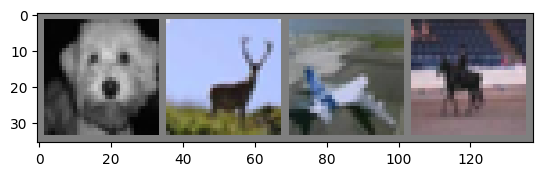

dog   deer  plane horse


In [4]:
import matplotlib.pyplot as plt
import numpy as np

# function pour afficher les images
def imshow(img):
    img = img / 2 + 0.5
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()


# obtenir aléatoirement cetaines images d'entrainement
dataiter = iter(trainloader)
images, labels = next(dataiter)

# afficher les images
imshow(torchvision.utils.make_grid(images))
# afficher les classes associées
classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')
print(' '.join(f'{classes[labels[j]]:5s}' for j in range(batch_size)))

In [5]:
images.shape

torch.Size([4, 3, 32, 32])

####Construction d'un réseau de neurone convolutionnelle

In [6]:
import torch.nn as nn
import torch.nn.functional as F


class Net(nn.Module):
    def __init__(self):
        super().__init__()
        self.conv1 = nn.Conv2d(3, 6, 5)
        self.conv2 = nn.Conv2d(6, 16, 5)
        self.fc1 = nn.Linear(16*5*5, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)

    def forward(self, x):
        x = F.max_pool2d(F.relu(self.conv1(x)), 2)
        x = F.max_pool2d(F.relu(self.conv2(x)), 2)
        x = torch.flatten(x, 1)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x


net = Net()

#### Fonction Loss et Optimiseur

La fonction de perte est défini ici comme étant la Cross Entropy. L'optimisuer est initialisé comme la descente de gradient stochastique avec un taux d'apprentissage de 0.001 et un momentum de 0.9.

In [7]:
import torch.optim as optim

criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=0.9)


####Entrainement du réseau de neurone

Ici l'entrainement ce fait sur 10 époques. Une époque correspond à une itération sur l'ensemble du jeu de données.

In [8]:
for epoch in range(10):

    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):
        inputs, labels = data

        optimizer.zero_grad() #Réinitialise les gradients

        outputs = net(inputs)

        loss = criterion(outputs, labels) #Calcule la perte entre les prédictions et les étiquettes
        #réelles.

        loss.backward() #calculer les gradients de la perte par
        #rapport aux paramètres du modèle.

        optimizer.step()#Met à jour les paramètres

        # affichages des statistiques
        running_loss += loss.item()
        if i % 2000 == 1999:    # afficher tout les 2000 mini-batches
            print(f'[{epoch + 1}, {i + 1:5d}] loss: {running_loss / 2000:.3f}')
            running_loss = 0.0

print('Finished Training')

[1,  2000] loss: 2.194
[1,  4000] loss: 1.891
[1,  6000] loss: 1.669
[1,  8000] loss: 1.565
[1, 10000] loss: 1.501
[1, 12000] loss: 1.458
[2,  2000] loss: 1.363
[2,  4000] loss: 1.351
[2,  6000] loss: 1.340
[2,  8000] loss: 1.302
[2, 10000] loss: 1.292
[2, 12000] loss: 1.257
[3,  2000] loss: 1.211
[3,  4000] loss: 1.182
[3,  6000] loss: 1.180
[3,  8000] loss: 1.183
[3, 10000] loss: 1.165
[3, 12000] loss: 1.189
[4,  2000] loss: 1.083
[4,  4000] loss: 1.097
[4,  6000] loss: 1.085
[4,  8000] loss: 1.105
[4, 10000] loss: 1.103
[4, 12000] loss: 1.098
[5,  2000] loss: 1.012
[5,  4000] loss: 1.017
[5,  6000] loss: 1.031
[5,  8000] loss: 1.037
[5, 10000] loss: 1.013
[5, 12000] loss: 1.034
[6,  2000] loss: 0.955
[6,  4000] loss: 0.959
[6,  6000] loss: 0.957
[6,  8000] loss: 0.978
[6, 10000] loss: 0.967
[6, 12000] loss: 0.980
[7,  2000] loss: 0.880
[7,  4000] loss: 0.921
[7,  6000] loss: 0.933
[7,  8000] loss: 0.928
[7, 10000] loss: 0.919
[7, 12000] loss: 0.943
[8,  2000] loss: 0.837
[8,  4000] 

####Sauvegarde des poids du modèle entrainé

In [9]:
PATH = './cifar_net.pth'
torch.save(net.state_dict(), PATH)

####Test du réseau sur les données de test

Nous avons entrainé le réseau sur 10 époques à travers les données d'entrainements. Maintenant nous allons vérifier si le réseau a bien appris toutes les données. Nous allons le vérifier en regardant les classes de sorties retournées par le réseau et les comparer aux véritables classes. Si la prediction est correcte, nous ajoutons l'échantillon considéré à la liste des prédictions correctes.

In [10]:
dataiter = iter(testloader) #crée un itérateur sur le chargeur de données de test
images, labels = next(dataiter) #récupère le prochain lot d'images et leurs étiquettes à partir de
#l'itérateur
net = Net() #création d'une nouvelle instance du modèle
net.load_state_dict(torch.load(PATH)) #chargement des paramètres du modèle entraîné
outputs = net(images)
print(outputs) # scores
m=nn.Softmax(dim=1)
print(m(outputs)) #probabilités

tensor([[-3.3437, -1.2806, -1.3753,  5.2306, -0.4311,  2.3153,  1.4035, -1.5945,
          0.8543, -1.0224],
        [ 5.8233,  8.3779, -2.5958, -4.3839, -4.5143, -5.0996, -5.4257, -4.1901,
          5.8926,  6.8792],
        [ 4.1707,  1.4360, -0.2410, -2.0771, -0.9047, -2.4324, -1.5207, -1.6566,
          3.4652,  1.6918],
        [ 2.2187,  0.0233,  2.6929,  1.1640,  0.7052, -1.5891, -3.4274, -0.7117,
         -0.2987, -0.9514]], grad_fn=<AddmmBackward0>)
tensor([[1.7204e-04, 1.3539e-03, 1.2317e-03, 9.1071e-01, 3.1664e-03, 4.9349e-02,
         1.9828e-02, 9.8922e-04, 1.1450e-02, 1.7529e-03],
        [5.6136e-02, 7.2230e-01, 1.2385e-05, 2.0716e-06, 1.8184e-06, 1.0128e-06,
         7.3096e-07, 2.5147e-06, 6.0167e-02, 1.6137e-01],
        [5.9859e-01, 3.8854e-02, 7.2636e-03, 1.1581e-03, 3.7402e-03, 8.1180e-04,
         2.0201e-03, 1.7634e-03, 2.9561e-01, 5.0182e-02],
        [2.8668e-01, 3.1911e-02, 4.6061e-01, 9.9847e-02, 6.3111e-02, 6.3637e-03,
         1.0124e-03, 1.5301e-02, 2.3125

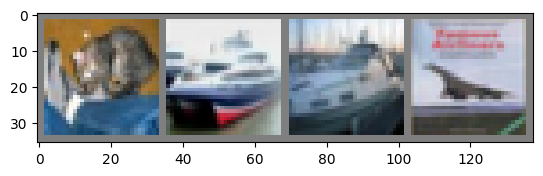

GroundTruth:  cat   ship  ship  plane
Predicted:  cat   car   plane bird 


In [11]:
_, predicted = torch.max(outputs, 1)

# affichage des images ( vraies étiquettes vs étiquettes prédits)
imshow(torchvision.utils.make_grid(images))
print('GroundTruth: ', ' '.join(f'{classes[labels[j]]:5s}' for j in range(4)))
print('Predicted: ', ' '.join(f'{classes[predicted[j]]:5s}'
                              for j in range(4)))

####Rapport de classification et matrice de confusion

In [12]:
all_labels = torch.tensor([])
all_predicted = torch.tensor([])
with torch.no_grad():
    for data in testloader:
        images, labels = data
        outputs = net(images)
        _, predicted = torch.max(outputs.data, 1)

        all_labels = torch.cat((all_labels, labels))
        all_predicted = torch.cat((all_predicted, predicted))

              precision    recall  f1-score   support

       plane       0.65      0.64      0.65      1000
         car       0.79      0.71      0.75      1000
        bird       0.52      0.53      0.52      1000
         cat       0.35      0.59      0.44      1000
        deer       0.56      0.59      0.58      1000
         dog       0.61      0.36      0.45      1000
        frog       0.76      0.63      0.69      1000
       horse       0.64      0.71      0.67      1000
        ship       0.82      0.61      0.70      1000
       truck       0.69      0.73      0.71      1000

    accuracy                           0.61     10000
   macro avg       0.64      0.61      0.62     10000
weighted avg       0.64      0.61      0.62     10000



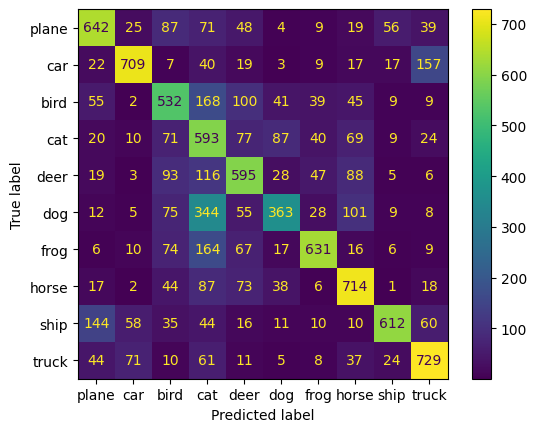

In [13]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

t_test = all_labels
t_pred = all_predicted


#rapport de classification
print(classification_report(t_test,t_pred,target_names = classes))

#matrice de confusion
cm = confusion_matrix(t_test,t_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels = classes)
disp.plot()
#Pour améliorer la matrixconfusion on peut augmenter le nbre de d'époque (epoch)

##Partie 2 : Ensemble de données 2D synthétiques

In [14]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn.datasets import make_moons, make_circles, make_classification, make_blobs, make_gaussian_quantiles
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from IPython.display import display, clear_output
import torch

Pour une tâche de classification, nous avons besoin :

- d'un ensemble de données divisé en test et entraînement
- d'une architecture de réseau
- d'un coût à minimiser
- Ensuite, il y a une phase d'entraînement  
- Enfin, il y a une phase de test

Le traitement des données est fait ci-dessous :    

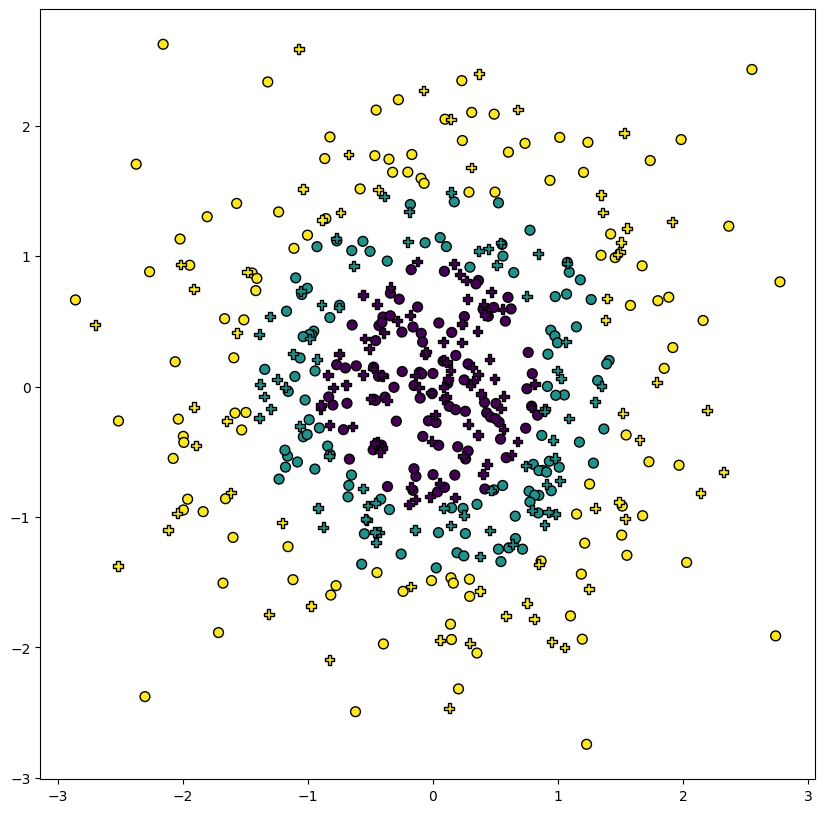

In [15]:
n_class = 3
from torch.utils.data import TensorDataset, DataLoader
#Données synthétiques 2D
X, t = make_gaussian_quantiles(n_features=2, n_classes=n_class, n_samples=500)

X = StandardScaler().fit_transform(X)

X_train, X_test, t_train, t_test = train_test_split(X, t, test_size=.4, random_state=12)

# Nombre de points de chaque ensemble :
N_train = X_train.shape[0]
N_test = X_test.shape[0]

figure = plt.figure(figsize=(10, 10))
plt.scatter(X_train[:, 0], X_train[:, 1], marker='o', c=t_train, s=50, edgecolor='k')
plt.scatter(X_test[:, 0], X_test[:, 1], marker='P', c=t_test, s=50, edgecolor='k');
plt.show()

#Conversion de numpy en tensors
X_train, X_test, t_train, t_test = torch.tensor(X_train, dtype=torch.float32), torch.tensor(X_test, dtype=torch.float32), torch.tensor(t_train, dtype=torch.int64), torch.tensor(t_test, dtype=torch.int64)

train_dataset = TensorDataset(X_train,t_train) #datset
trainloader = DataLoader(train_dataset) #dataloader

test_dataset = TensorDataset(X_test,t_test) #datset
testloader = DataLoader(test_dataset) #dataloader

#### Architecture du réseau

L'architecture du réseau est la suivante :     
- Une couche linéaire avec une taille de sortie $d$, suivie d'une activation Relu
- Une couche linéaire permettant la classification avec une taille de sortie permettant la classification (ie ayant le nombre de classes en taille de sortie)

In [16]:
import torch.nn as nn
import torch.nn.functional as F

d = 4
class Net(nn.Module):

    def __init__(self):
        super(Net,self).__init__()
        self.fc1 = nn.Linear(2,d)
        self.fc2 = nn.Linear(d,3)

    def forward(self, x):
        x = F.relu(self.fc1(x))
        x = self.fc2(x)
        return x

net_2D = Net()
print(net_2D)

Net(
  (fc1): Linear(in_features=2, out_features=4, bias=True)
  (fc2): Linear(in_features=4, out_features=3, bias=True)
)


#### Le coût

Le coût utilisé est le coût habituel.

In [17]:
import torch.optim as optim
criterion=nn.CrossEntropyLoss()


####Phase d'entraînement

On utilisera un SGD avec lr = 0.001 et un moment 0.9. De plus, l'entraînement sera mené sur 100 époques.

In [18]:
optimizer=optim.SGD(net_2D.parameters(),lr=0.001,momentum=0.9)
import torch.optim as optim



for epoch in range(100):
    for i, data in enumerate(trainloader, 0):
        inputs, labels = data

        optimizer.zero_grad()

        outputs = net_2D(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

####Visualisation des résultats

En 2D, on peut afficher la classification effectué par le réseau.

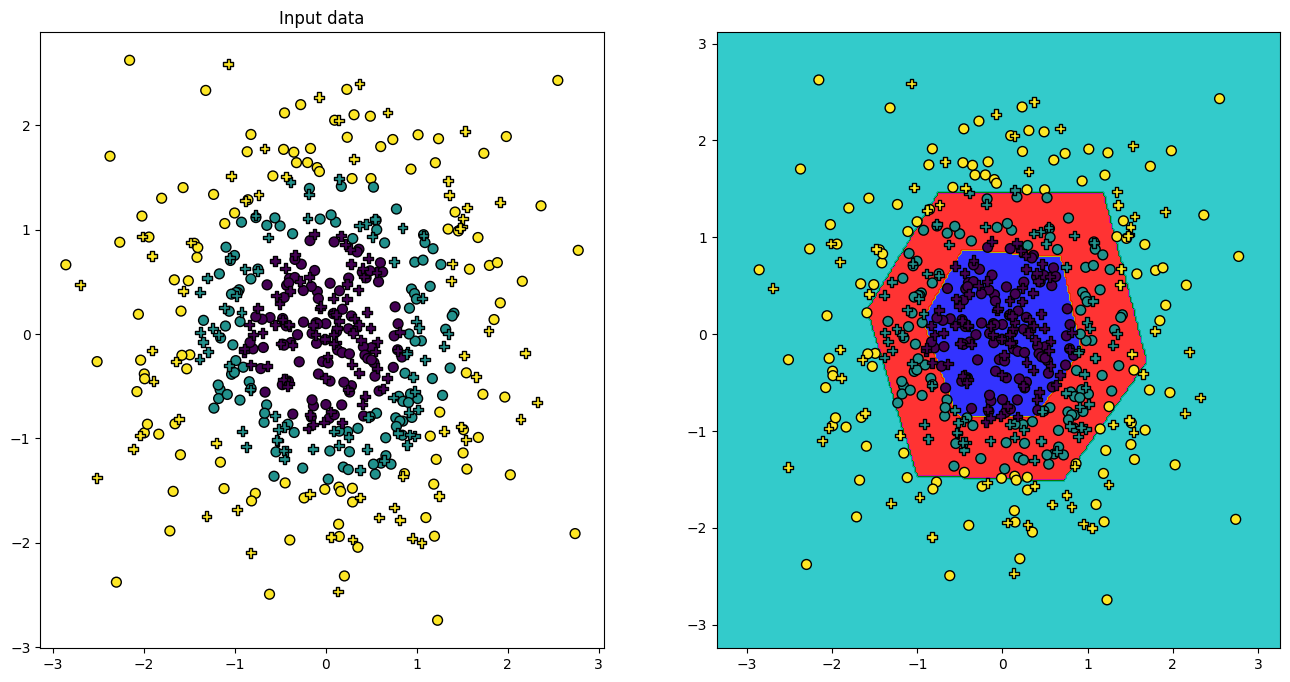

In [19]:
x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
h = 0.02
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                        np.arange(y_min, y_max, h))
X_grid = np.hstack((xx.ravel(), yy.ravel()))

N_grid = xx.ravel().shape[0]
X_grid = np.c_[xx.ravel(), yy.ravel()]

feature_transform = lambda x : (net_2D(torch.tensor(x, dtype=torch.float32).unsqueeze(0)).detach().numpy())

Phi_grid = feature_transform(X_grid)

Z =np.argmax(Phi_grid,axis=2)
Z = Z.reshape(xx.shape)

figure = plt.figure(figsize=(16, 8))
ax = plt.subplot(1,2,1)
ax.set_title("Input data")
ax.scatter(X_train[:, 0], X_train[:, 1], marker='o', c=t_train, s=50, edgecolor='k')
ax.scatter(X_test[:, 0], X_test[:, 1], marker='P', c=t_test, s=50, edgecolor='k')
ax = plt.subplot(1,2,2)
cmap = ListedColormap(['b','y','r','m','g','c'])
plt.contourf(xx,yy,Z,  cmap = cmap, alpha=.8)
ax.scatter(X_train[:, 0], X_train[:, 1], marker='o', c=t_train, s=50, edgecolor='k')
ax.scatter(X_test[:, 0], X_test[:, 1], marker='P', c=t_test, s=50, edgecolor='k')

####Performance du réseau

In [ ]:
all_labels = torch.tensor([])
all_predicted = torch.tensor([])
with torch.no_grad(): # pas besoin de gradient pour ce qu'on fait , on l'a deja fait plus haut
    for data in testloader:
        images, labels = data
        outputs = net_2D(images)
        _, predicted = torch.max(outputs.data, 1)

        all_labels = torch.cat((all_labels, labels))
        all_predicted = torch.cat((all_predicted, predicted))


In [ ]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

t_test = all_labels
t_pred = all_predicted


#Classification report
print(classification_report(t_test,t_pred))

#Confusion matrix
cm = confusion_matrix(t_test,t_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
#pour améliorer la matrixconfusion on peut augmenter le nbre de passage